In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('tspcc/output.csv')
print(df.shape)

(3087, 4)


In [64]:
NB_CITY = 10

In [65]:
#Keep only the rows with i_city = NB_CITY
df = df[df['i_city'] == NB_CITY]
#Keep only the rows with i_avg < 8
df = df[df['i_avg'] < 8]

In [66]:
#Group by i_thread
df = df.groupby('i_thread')

In [67]:
#Get the mean of 'elapsed_time' of each group
df = df['elapsed_time'].mean()
#Convert to dataframe
df = df.to_frame()
#Reset index
df = df.reset_index()

In [68]:
# Calculate the efficiency of each thread
df['efficiency'] = df['elapsed_time'][0] / df['elapsed_time']
df.head(20)

,i_thread,elapsed_time,efficiency
0,1,5.360893,1.000000
1,8,2.504104,2.140843
2,16,2.514211,2.132236
3,24,2.340298,2.290688
4,32,2.189384,2.448585
5,40,2.167020,2.473855
6,48,2.023226,2.649675
7,56,2.253195,2.379240
8,64,2.118453,2.530570
9,72,2.243586,2.389430


In [69]:
df['elapsed_time'][0]

5.3608925

In [70]:
# Calculate the speedup of each thread
df['speedup'] = (df['elapsed_time'][0] - df['elapsed_time']) / df['i_thread']

In [71]:
#Rename column i_thread to nb_threads for clarity
df = df.rename(columns={'i_thread': 'nb_threads'})

<Axes: title={'center': 'Speedup with 10 cities'}, xlabel='nb_threads'>

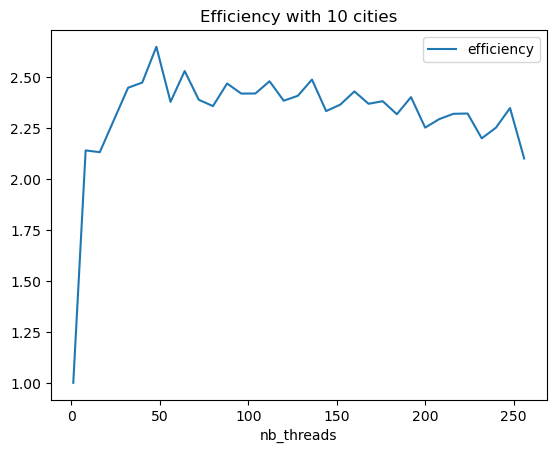

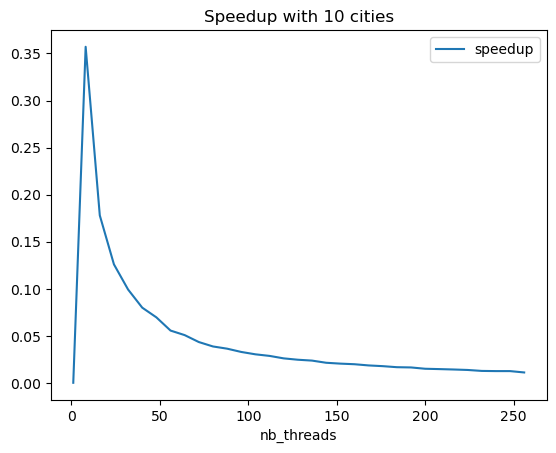

In [72]:
# plot the efficiency with NB_CITY in the title
df.plot(x='nb_threads', y='efficiency', title='Efficiency with ' + str(NB_CITY) + ' cities')

# plot the speedup with NB_CITY in the title
df.plot(x='nb_threads', y='speedup', title='Speedup with ' + str(NB_CITY) + ' cities')